In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import CPDTable, BNet, MyGibbsSampler, MyVariableElimination

<br>

# Example 1: Burglary network

A burglary network: 

$Burglary \rightarrow Alarm$; $Earthquake \rightarrow Alarm$; $Alarm \rightarrow MaryCalls$; $Alarm \rightarrow JohnCalls$

<br>

Initialize edges

In [2]:
burglary_edges = [
    ("Burglary", "Alarm"),
    ("Earthquake", "Alarm"),
    ("Alarm", "JohnCalls"),
    ("Alarm", "MaryCalls"),
]

<br>

Initiliaze Bayesian net model

In [3]:
burglary_model = BNet(burglary_edges)

<br>

Create conditional probability distribution tables

In [4]:
cpd_burglary = CPDTable(
    target=["Burglary"], 
    values=[[0.999], [0.001]]
)

cpd_earthquake = CPDTable(
    target=["Earthquake"], 
    values=[[0.998], [0.002]]
)

cpd_alarm = CPDTable(
    target=["Alarm"],
    values=[
        [0.999, 0.71, 0.06, 0.05], 
        [0.001, 0.29, 0.94, 0.95]
    ],
    evidence=["Burglary", "Earthquake"]
)
cpd_johncalls = CPDTable(
    target=["JohnCalls"],
    values=[
        [0.95, 0.1], 
        [0.05, 0.9]
    ],
    evidence=["Alarm"]    
)

cpd_marycalls = CPDTable(
    target=["MaryCalls"],    
    values=[
        [0.1, 0.7], 
        [0.9, 0.3]
    ],
    evidence=["Alarm"],
)

<br>

Add CPDs to the model

In [5]:
cpds = [cpd_burglary, cpd_earthquake, cpd_alarm, cpd_johncalls, cpd_marycalls]
for cpd in cpds:
    burglary_model.add_cpd(cpd)

<br>

Initialize variable eliminator

In [6]:
eliminator = MyVariableElimination(burglary_model)

<br>

Initialize Gibbs sampler

In [7]:
sampler = MyGibbsSampler(
    burglary_model,
    burn_in=1e+3,
    no_iters=1e+6,
    thinning=10,
    conf_level=0.95
)

<br>

### Query 1a

P(MaryCalls | JohnCalls = 1)

<br>

Run Gibbs sampling

In [8]:
%time sampler.run_query(['MaryCalls'], {'JohnCalls' : 1})

CPU times: user 1min 24s, sys: 201 ms, total: 1min 24s
Wall time: 1min 25s


<br>

To demonstrate convergence, calculate statistics under exponentially expanding number of observations

In [9]:
expected = []
conf_int = []
no_observations = 10**(np.arange(1, 5, 1) + 1)
for n in no_observations:
    results = sampler.get_results(max_obs = n)
    e, ci = results['MaryCalls']
    expected.append(e)
    conf_int.append(ci)    

<br>

Calculate true expectations using variable elimination

In [10]:
results = eliminator.run_query(
    variables = ['MaryCalls'], 
    evidence = {'JohnCalls' : 1}
)
TRUE_EXPECTATION = results.values[1]

Variables to eliminate in order: Burglary, Earthquake, Alarm


<br>

Compare the obtained results

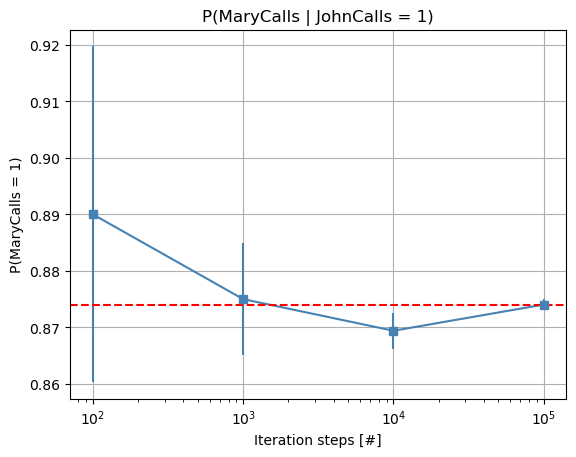

In [11]:
plt.errorbar(
    x = no_observations, 
    y = expected, 
    yerr = conf_int, 
    fmt = 's',
    color = 'steelblue'
)

plt.plot(
    no_observations,
    expected,
    color = 'steelblue'
)

plt.axhline(
    y = TRUE_EXPECTATION, 
    ls = '--', 
    color = 'red'
)

plt.title('P(MaryCalls | JohnCalls = 1)')
plt.ylabel('P(MaryCalls = 1)')
plt.xlabel('Iteration steps [#]')
plt.xscale('log')
plt.grid()
plt.show()

<br>

### Query 1b

P(MaryCalls | JohnCalls = 0)

<br>

Run Gibbs sampling

In [12]:
%time sampler.run_query(['MaryCalls'], {'JohnCalls' : 0})

CPU times: user 1min 23s, sys: 97.6 ms, total: 1min 23s
Wall time: 1min 23s


<br>

To demonstrate convergence, calculate statistics under exponentially expanding number of observations

In [13]:
expected = []
conf_int = []
no_observations = 10**(np.arange(1, 5, 1) + 1)
for n in no_observations:
    results = sampler.get_results(max_obs = n)
    e, ci = results['MaryCalls']
    expected.append(e)
    conf_int.append(ci)    

<br>

Calculate true expectations using variable elimination

In [14]:
results = eliminator.run_query(
    variables = ['MaryCalls'], 
    evidence = {'JohnCalls' : 0}
)
TRUE_EXPECTATION = results.values[1]

Variables to eliminate in order: Burglary, Earthquake, Alarm


<br>

Compare the obtained results

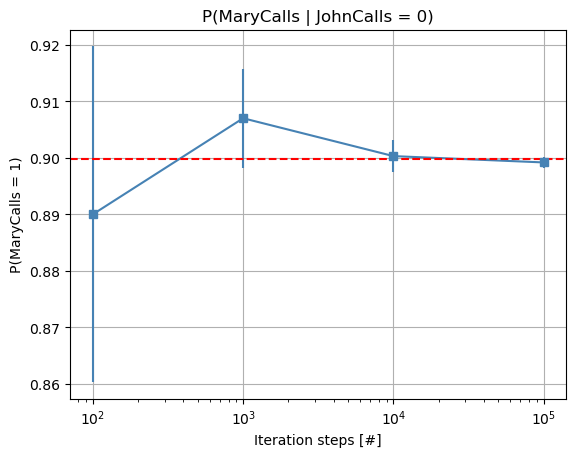

In [15]:
plt.errorbar(
    x = no_observations, 
    y = expected, 
    yerr = conf_int, 
    fmt = 's',
    color = 'steelblue'
)

plt.plot(
    no_observations,
    expected,
    color = 'steelblue'
)

plt.axhline(
    y = TRUE_EXPECTATION, 
    ls = '--', 
    color = 'red'
)

plt.title('P(MaryCalls | JohnCalls = 0)')
plt.ylabel('P(MaryCalls = 1)')
plt.xlabel('Iteration steps [#]')
plt.xscale('log')
plt.grid()
plt.show()

<br>

# Example 2: 

A rain network: 

$Cloudy \rightarrow Sprinkler$; $Cloudy \rightarrow Rain$; $Sprinkler \rightarrow WetGrass$; $Rain \rightarrow WetGrass$

<br>

Initialize edges

In [16]:
edges = [
    ('Cloudy', 'Sprinkler'), 
    ('Cloudy', 'Rain'),     
    ('Sprinkler', 'WetGrass'), 
    ('Rain', 'WetGrass'),     
]

<br>

Initialize Bayesian net model

In [17]:
rain_model = BNet(edges)

<br>

Create CPD tables

In [18]:
cpd_cloudy = CPDTable(
    target = ["Cloudy"], 
    values=[[0.5], [0.5]]
)

cpd_sprinkler = CPDTable(
    target=["Sprinkler"], 
    values=[
        [0.5, 0.9], 
        [0.5, 0.1]
    ],
    evidence = ['Cloudy']
)

cpd_rain = CPDTable(
    target=["Rain"], 
    values=[
        [0.8, 0.2], 
        [0.2, 0.8]
    ],
    evidence = ['Cloudy']
)

cpd_wetgrass = CPDTable(
    target=["WetGrass"],
    values=[
        [0.99, 0.10, 0.10, 0.01], 
        [0.01, 0.90, 0.90, 0.99]
    ],
    evidence=["Sprinkler", "Rain"]
)

<br>

Add CPDs to the model

In [19]:
cpds = [cpd_cloudy, cpd_sprinkler, cpd_rain, cpd_wetgrass]
for cpd in cpds:
    rain_model.add_cpd(cpd)

<br>

Initialize variable eliminator

In [20]:
eliminator = MyVariableElimination(rain_model)

<br>

Initialize Gibss sampler

In [21]:
sampler = MyGibbsSampler(
    rain_model,
    burn_in=1e+3,
    no_iters=1e+6,
    thinning=10,
    conf_level=0.95
)

<br>

Run Gibbs sampling

In [22]:
%time sampler.run_query(['WetGrass'], {'Cloudy' : 1})

CPU times: user 1min 2s, sys: 88.7 ms, total: 1min 2s
Wall time: 1min 2s


<br>

To demonstrate convergence, calculate statistics under exponentially expanding number of observations

In [23]:
expected = []
conf_int = []
no_observations = 10**(np.arange(1, 5, 1) + 1)
for n in no_observations:
    results = sampler.get_results(max_obs = n)
    e, ci = results['WetGrass']
    expected.append(e)
    conf_int.append(ci)      

<br>

Calculate true expectations using variable elimination

In [24]:
results = eliminator.run_query(
    variables = ['WetGrass'], 
    evidence = {'Cloudy' : 1}
)
TRUE_EXPECTATION = results.values[1]

Variables to eliminate in order: Sprinkler, Rain


<br>

Compare the obtained results

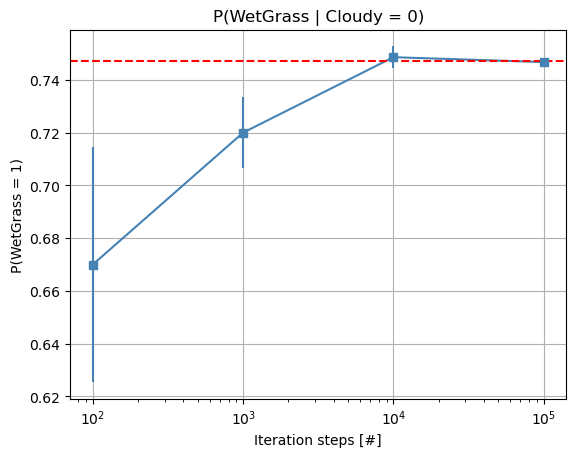

In [25]:
plt.errorbar(
    x = no_observations, 
    y = expected, 
    yerr = conf_int, 
    fmt = 's',
    color = 'steelblue'
)

plt.plot(
    no_observations,
    expected,
    color = 'steelblue'
)

plt.axhline(
    y = TRUE_EXPECTATION, 
    ls = '--', 
    color = 'red'
)

plt.title('P(WetGrass | Cloudy = 0)')
plt.ylabel('P(WetGrass = 1)')
plt.xlabel('Iteration steps [#]')
plt.xscale('log')
plt.grid()
plt.show()

---